In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from scipy.ndimage import convolve

# Homework 2

Homework 2 will cover materials from chapter 3 (histogram based analysis) and 4 (convolution).

Ideally, computational, analytical, and written parts can be submitted as part of this jupyter notebook.

Homework should be submitted by email, to dtward@mednet.ucla.edu.

Conding parts can be submitted as part of the notebook, using as many cells as is convenient.

Analytical parts should be submitted with math rendered using Latex in markdown cells, using as many cells as is convenient.

Written parts can use markdown cells.

If you do not know how to type equations in Latex, and cannot work out enough of the basics using the equations provided here, please email me and we'll work something out.

There is lots of exposition in this homework assignment.  All the problems that need to be solved are labeld with the the title "Problem".

Homework will be due on Friday February 16.

## Grading guidlines

I try to grade as reproducibly as possible by avoiding "fine grained" grades, and only using a few values.

Each problem presented below will be given equal weight (unless otherwise specified).  And I will grade them in the following manner

1: The work was perfect or had very minor flaws

2/3: The work had some nontrivial errors

1/3: The work had many errors, was not finished, or demonstrated a lack of understanding.

0: The work was not done at all, or showed an unambiguous lack of effort.

The final grade will be the average grade of all the problems (or weighted average if specified).

Note that if your code does not work, this does not mean you will get a 0.  I will read the code, not just look at the outputs.  But, I would encourage you to ask me questions so that you can turn in working code.  If anyone is unhappy with my grading, please email me.

## Part 1: Histograms


### 1.1 The Komogorov-Smirnov distance

The KS distance between two densities is defined as the maximum of the distance between their CDFs.

If $f_0,f_1$ are two probability densities, with $F_0,F_1$ their corresponding CDFs, the KS distance is defined as
\begin{align}
\max_t |F_0(t) - F_0(t)|
\end{align}

The KS distance is often used in nonparametric statistical testing, because it makes no assumptions about the distribution of our data.  This is in contrast to (for example) the t-test, which assumes our data is Gaussian.

### Problem 1.1.1

Load the datasets Istack0.npy (erythroblasts) and Istack1.npy (lymphocytes).

Save the first two images from Istack0, and the first image from Istack1.

Compute CDFs for all these images, sampled on 101 bin edges linearly spaced between -0.1 and 1.1.

You can use the built in matplotlib function, cdfI,bins,containers = plt.hist(...), specifying appropriate bins, and specifying cumulative=True and density=True, but the visualization this produces by default will "not beautiful".

Create a line plot of the bin centers versus the three cdfs on the same axes.

### Problem 1.1.1 Solution
1. Load in the three images which is given to us
2. I compute the cdfs and get the centers of each bin of each image by doing the following:
    - Grabbing the histogram and the bins from the hisgtogram
        - I use `np.flatten()` which puts the array of each image into one dimension
        - Specify the bin edges to be 101
        - Space the bins between -0.1 and 1.1
    - Calculate the bin centers by excluding the first and last element and then dividing by 2. This is because we can get consecutive bins this way
    - Calculate the cdf using `cumsum()` / `np.sum()` of the histograms 

<IPython.core.display.Javascript object>


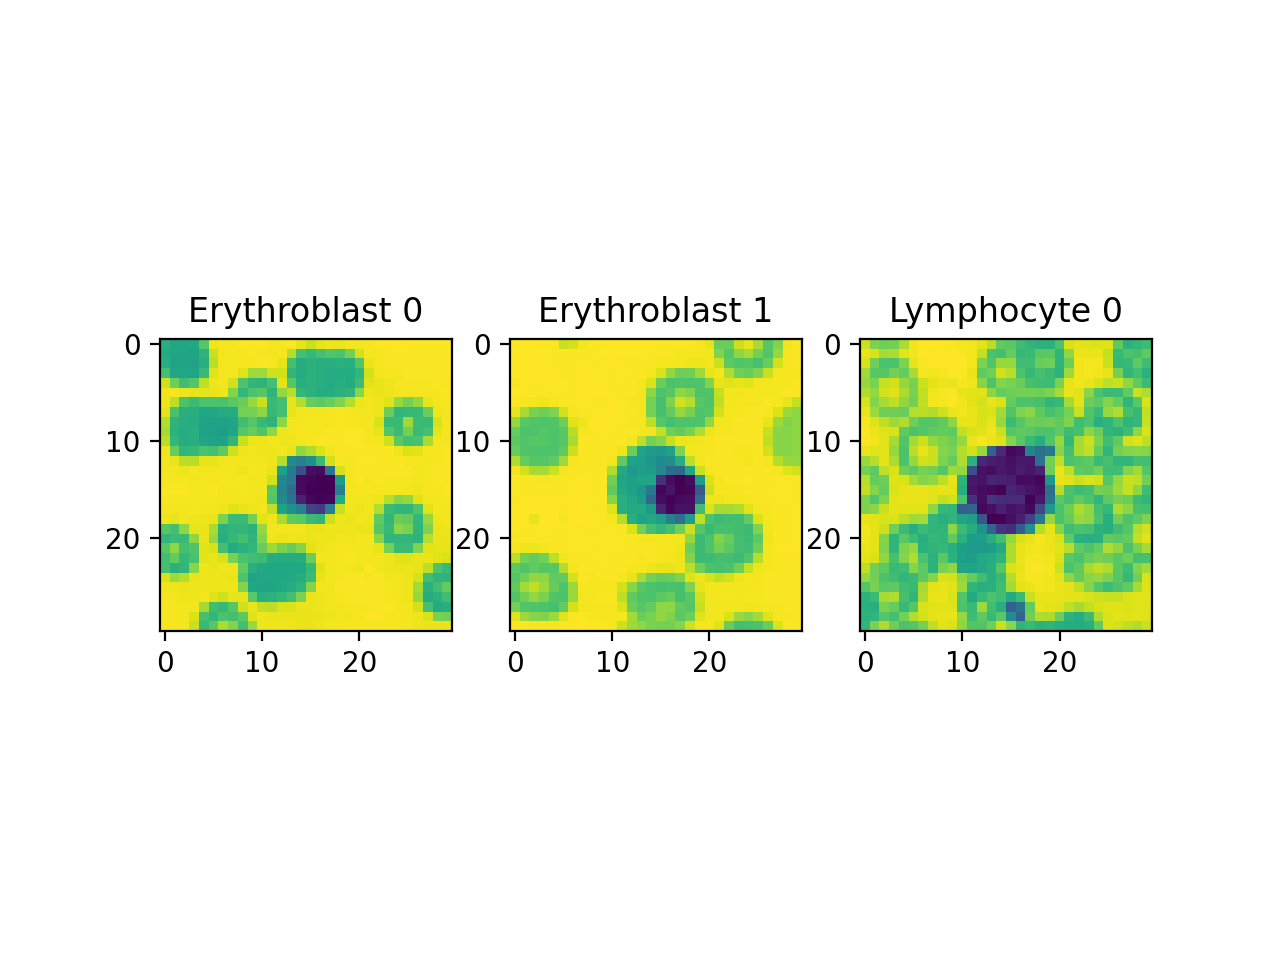

Text(0.5, 1.0, 'Lymphocyte 0')

In [3]:
Istack0 = np.load('Istack0.npy')
Istack1 = np.load('Istack1.npy')

# save three images
I = Istack0[0]/255.0
J = Istack0[1]/255.0
K = Istack1[0]/255.0

# visualize
fig,ax = plt.subplots(1,3)
ax[0].imshow(I)
ax[0].set_title('Erythroblast 0')
ax[1].imshow(J)
ax[1].set_title('Erythroblast 1')
ax[2].imshow(K)
ax[2].set_title('Lymphocyte 0')

In [4]:
# your code here
def compute_cdf(image):
    hist, bins = np.histogram(image.flatten(), bins=101, range=(-0.1, 1.1))
    bin_centers = (bins[:-1] + bins[1:]) / 2
    cdf = np.cumsum(hist) / np.sum(hist)
    return bin_centers, cdf

In [5]:
bins_I, cdf_I = compute_cdf(I)
bins_J, cdf_J = compute_cdf(J)
bins_K, cdf_K = compute_cdf(K)

<IPython.core.display.Javascript object>


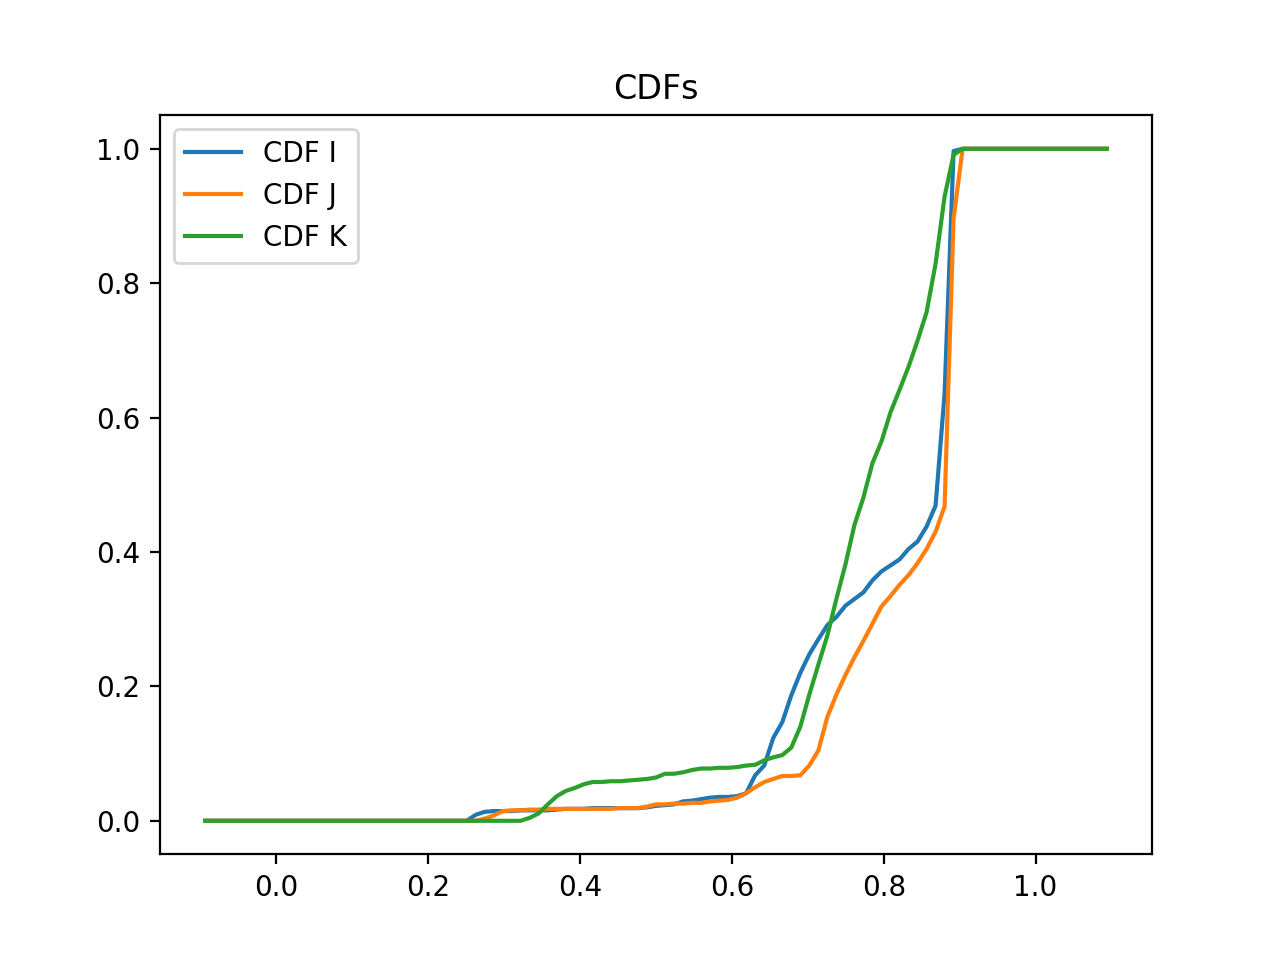

In [6]:
fig, ax = plt.subplots()
ax.plot(bins_I, cdf_I, label='CDF I')
ax.plot(bins_J, cdf_J, label='CDF J')
ax.plot(bins_K, cdf_K, label='CDF K')
ax.set_title('CDFs')
ax.legend();

### Problem 1.1.2

Compute the KS distance between the two CDFs of erythroblasts.  

Then compute the average of the KS distances between the erythroblasts and the lymphoctye.

Is the "within group distance"  bigger than the average "between group distance"?

### Problem 1.1.2 Solution
1. We know the KS distance formula as long as we have 2 CDFs \begin{align}
\max_t |F_0(t) - F_0(t)|
\end{align} 


2. Build the KS distance function
    - Use `np.max()` which gives us the max value of an array
    - Use `np.abs()` which gives us an absolute value of some array
    - Subtract two cdfs together
3. Call the KS distance function on the erythroblasts
4. Call the KS distance function on erythroblast 1 and lymphocyte
5. Call the KS distance function on erythroblast 2 and lympocyte
6. Add the values returned from `step 3` and `step 4` and divide by 2 to get the average

In [7]:
# your code here
def ks_distance(cdf1, cdf2):
    return np.max(np.abs(cdf1 - cdf2))

In [8]:
print(ks_distance(cdf_I, cdf_J))

0.16777777777777775


In [9]:
print((ks_distance(cdf_I, cdf_K) + ks_distance(cdf_J, cdf_K)) / 2)

0.41055555555555556


The average between group distance is larger than the within group distance. As we can see the average between group distance is roughly .41 while the within group distance is roughly .1677.

## Part 2: Thresholding

We will extend the thresholding algorithms discussed in class to 3 categories instead of just foreground and background.

### Problem 2.1.1

Load the file coronal_mri.npy.  

By copying the Gaussian mixture modeling code already provided in class, and changing the mu, sigma2, and pi parameters to have length 3, and have appropriate values, try to separate the MR image into cerebrospinal fluid+background, gray matter, and white matter.

Compute the class with maximum probability at each pixel.  Visualize the results by displaying an integer valued image with 0=CSF, 1=gray matter, and 2=white matter.



### Problem 2.1.1 Solution
1. Load in the mri image
2. Change `mu`, `sigma2`, and `pi` to have a length of 3:
    - `mu` represents the center of the normal distribution
    - `sigma2` represents variance of the distribution
    - `pi` represents the mixing coeffiecients and the array should always be equal to 1
    - **Note**: these are initial guesses for our algorithm to start with so we can get to a convergence
3. Get the max class of `c` using `np.argmax`
3. Leave the rest of the code the same from class

<IPython.core.display.Javascript object>


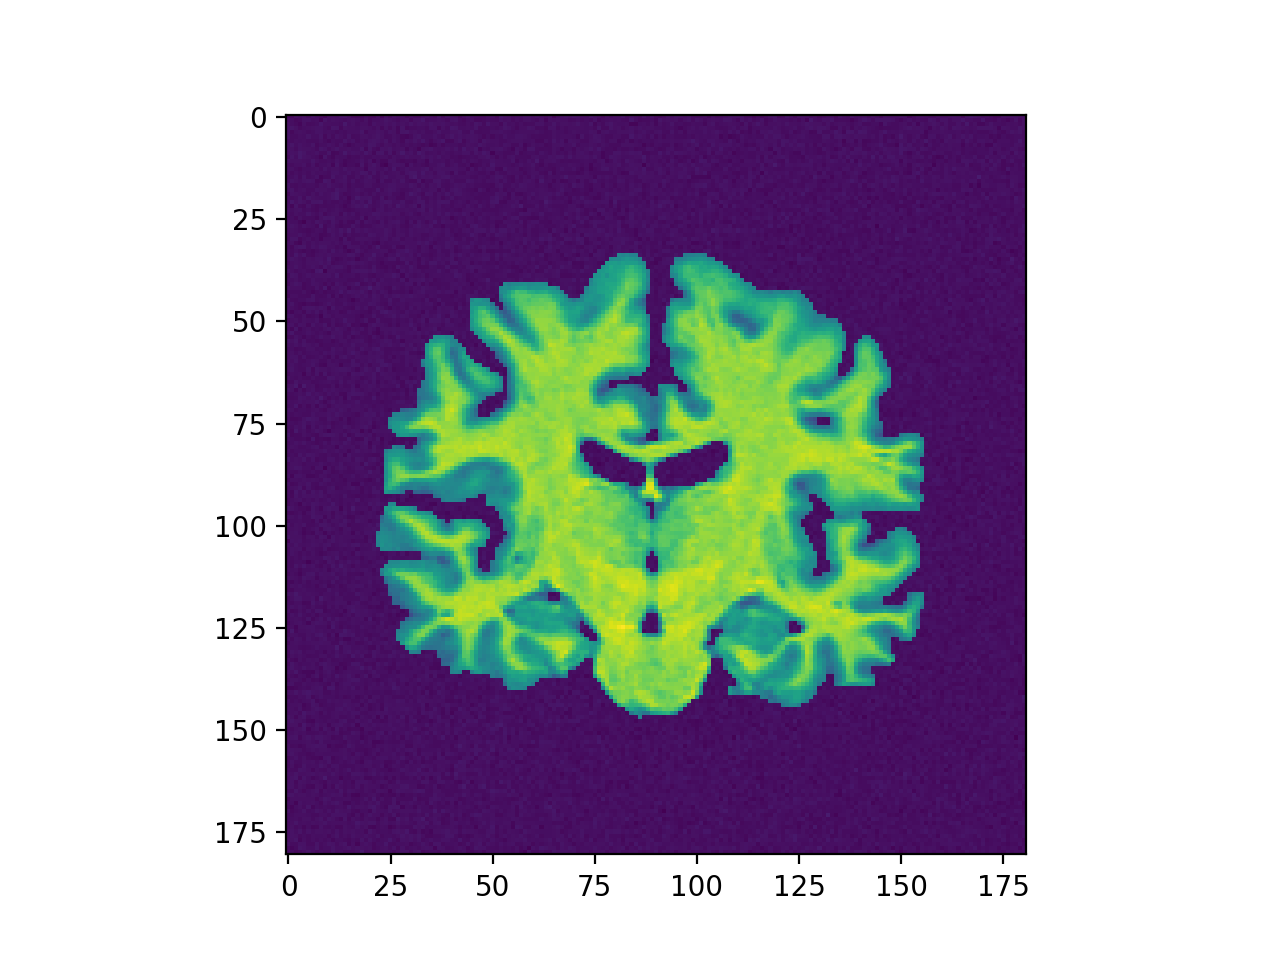

In [27]:
I = np.load('coronal_mri.npy')
fig,ax = plt.subplots()
ax.imshow(I)

<IPython.core.display.Javascript object>


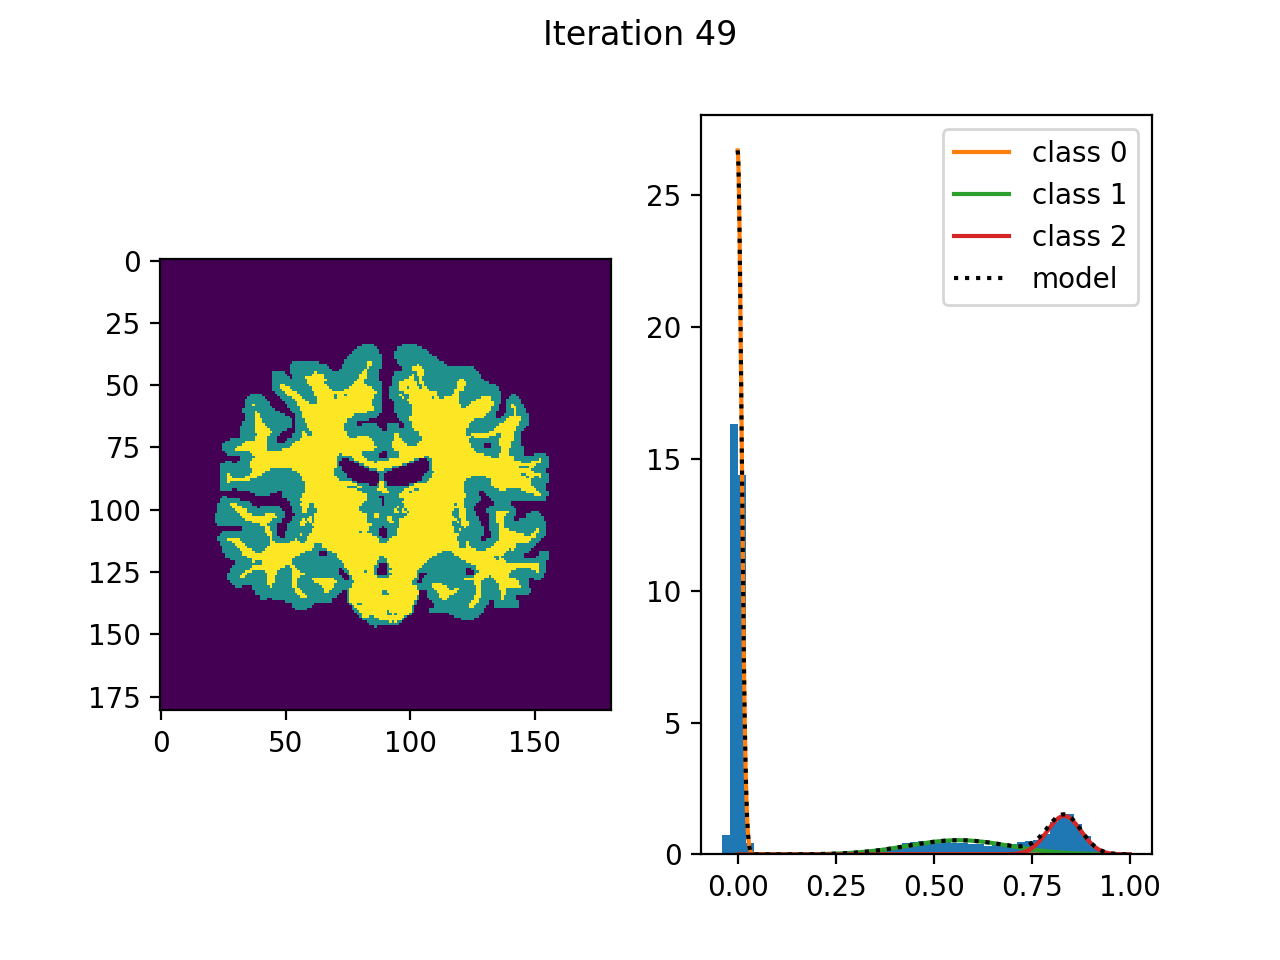

In [28]:
# now em algorithm
mu = np.array([0.0, 0.5, 1.0])
sigma2 = np.array([1.0, 0.5, 1.0])
pi = np.array([1/3, 1/3, 1/3])
k = len(mu)

# define a gaussian function
def phi(t, mu, sigma2):
    return np.exp(-(t[None] - mu) ** 2 / (2 * sigma2)) / np.sqrt(2.0 * np.pi * sigma2)

# a domain for plotting
t = np.linspace(0, 1, 1000)


fig, ax = plt.subplots(1, 2)
itermax = 50
for it in range(itermax):
    # calculate the class probabilities
    c_ = np.exp(-(I[None, :, :] - mu[:, None, None]) ** 2 / (2 * sigma2[:, None, None])) / np.sqrt(
        2.0 * np.pi * sigma2[:, None, None])
    # make sure it is properly normalized by dividing by the sum
    c = pi[:, None, None] * c_ / np.sum(pi[:, None, None] * c_, 0, keepdims=True)

    # update the parameters
    # weights
    w = np.sum(c, (-1, -2))
    # heights
    pi = w / np.sum(w)
    # means
    mu = np.sum(I * c, (-1, -2)) / w
    # variances
    sigma2 = np.sum((I[None, :, :] - mu[:, None, None]) ** 2 * c, (-1, -2)) / w
    max_class = np.argmax(c, axis=0)
    # let's draw
    ax[0].cla()
    ax[0].imshow(max_class, interpolation='none', vmin=0, vmax=k - 1, cmap='viridis')
    ax[1].cla()
    ax[1].hist(I.ravel(), 50, density=True)
    p = t * 0
    for i in range(k):
        gaussian = pi[i] * phi(t, mu[i], sigma2[i])[0]
        ax[1].plot(t, gaussian, label=f'class {i}')
        p += gaussian
    ax[1].plot(t, p, ':k', label=f'model')
    ax[1].legend()
    fig.suptitle(f'Iteration {it}')

    fig.canvas.draw()

    plt.pause(1)


## Part 3: Gradient descent


### 3.1 Denoising
Because noise tends to be uncorrelated from one pixel to another, we expect the gradient of an image to have a large magnitude where there is lots of noise, and a small magnitude where there is little noise.  Given a noisy image $J(x)$, a standard approach to denoising is to find an image $I(x)$ that minimizes the loss function

\begin{align}
I^*(x) = \arg\min_I E(I) = \arg\min_I \int |I(x) - J(x)|^2 + \gamma |\nabla I(x)|^2dx
\end{align}

Here $\gamma$ is a parameter that controls the tradoff between fidelity ($I$ should be close to $J$), and noise level ($I$ should have a small derivative).

We can compute the derivative by taking a perturbation $I \mapsto I + \epsilon \delta I$, and taking the derivative with respect to $\epsilon$
\begin{align}
&\frac{d}{d\epsilon } E(I + \epsilon \delta I ) \\
&= \int |I(x) + \epsilon \delta I(x) - J(x)|^2 + \gamma |\nabla [I(x) + \epsilon \delta I(x)]|^2dx \big|_{\epsilon = 0}\\
&=\int 2(I(x) - J(x)) \delta I(x) + 2\gamma  \nabla I(x)^T \nabla \delta (x) dx\\
&= \int 2(I(x) - J(x)) \delta I(x) - 2\gamma  [\text{div} (\nabla I(x))] \delta I(x) dx
\end{align}
In the last line we applied the divergence theorem, assuming that boundary conditions are 0.  Note that $\text{div} \nabla I(x) = \Delta I(x)$, the Laplacian of I(x).

We can factor out the perturbation to determine the gradient
\begin{align}
&=  \int 2 \left( (I(x) - J(x))  - \gamma \Delta I(x) \right) \delta I(x) dx
\end{align}

The gradient is the term that multiplies the perturbation.
\begin{align}
\nabla E(I) = 2[(I - J) - \gamma \Delta I]
\end{align}


### Problem 3.1.1

Build a gradient descent algorithm to remove noise from an image.  Note you can calculate the discrete Laplacian by convolution with the filter 
\begin{align}
\begin{pmatrix}
0 & 1 & 0\\
1 & -4 & 1\\
0 & 1 & 0
\end{pmatrix}
\end{align}

In this problem we will assume the pixel size is 1, so integrals are approximated by sums.

### Problem 3.1.1 Solution
- To solve this problem I did the following:
    1. Used the objective function (loss function since we are minimizing) that is given
        - We take the absolute value using `np.abs()`
        - Inside of `np.abs()` we subtract `I` which is our initial guess of J, once they are subtracted we raise to the power of 2
        - Then we take the gradient of I, which results in two arrays, raise them to the second power, and add them together
        - Lastly we add the first part and the second part together
   2. Calculated the laplacian of the image and our matrix `k` by using scipy's `convolve` function
   3. Calculate the gradient by:
       - Subtracting I - J
       - Multiplying gamma and the laplacian of the image and k
       - Subtracting step 3.1 and 3.2
       - Multiply by 2

<IPython.core.display.Javascript object>


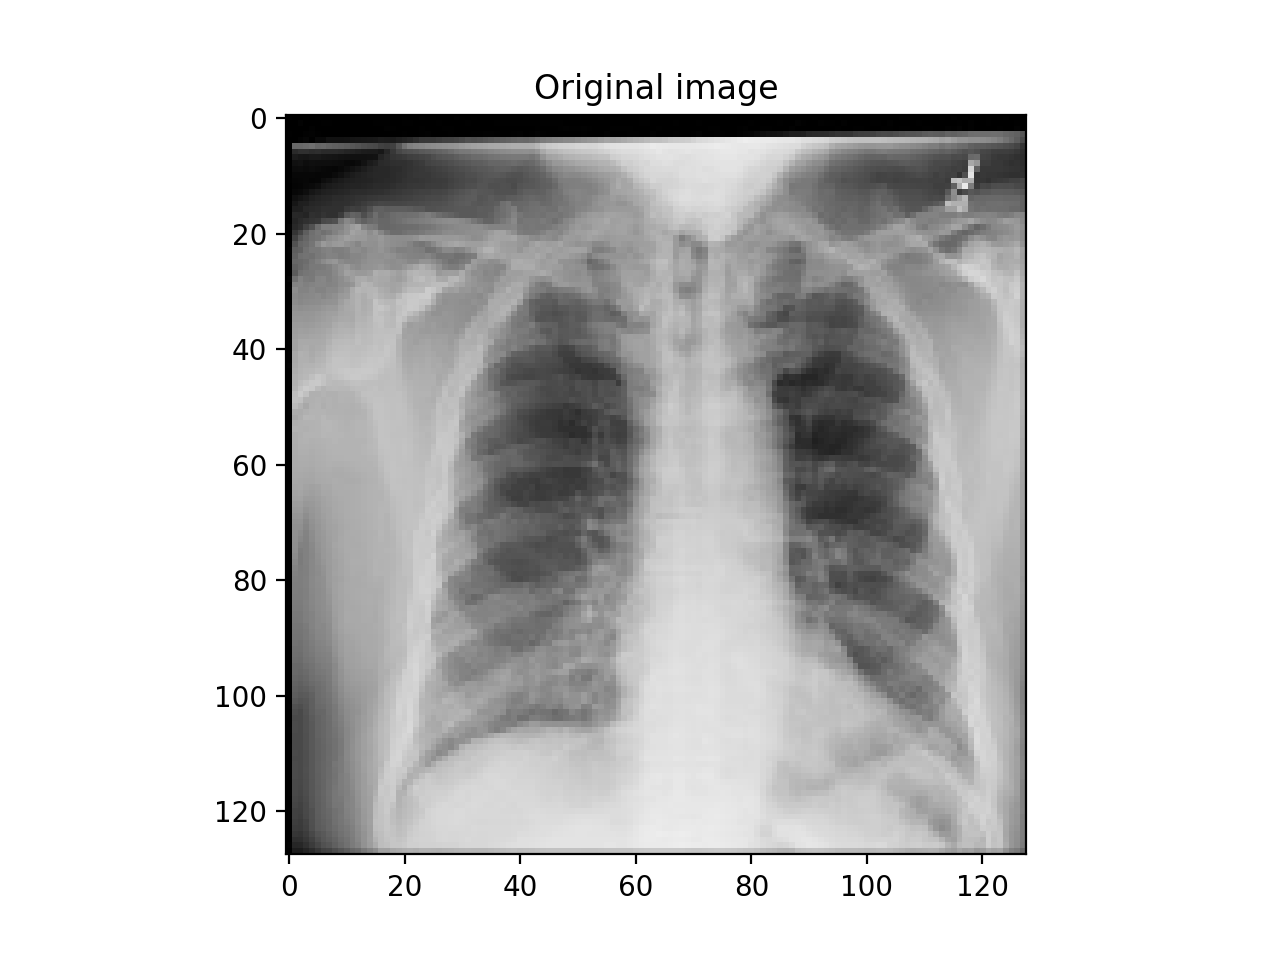

<IPython.core.display.Javascript object>


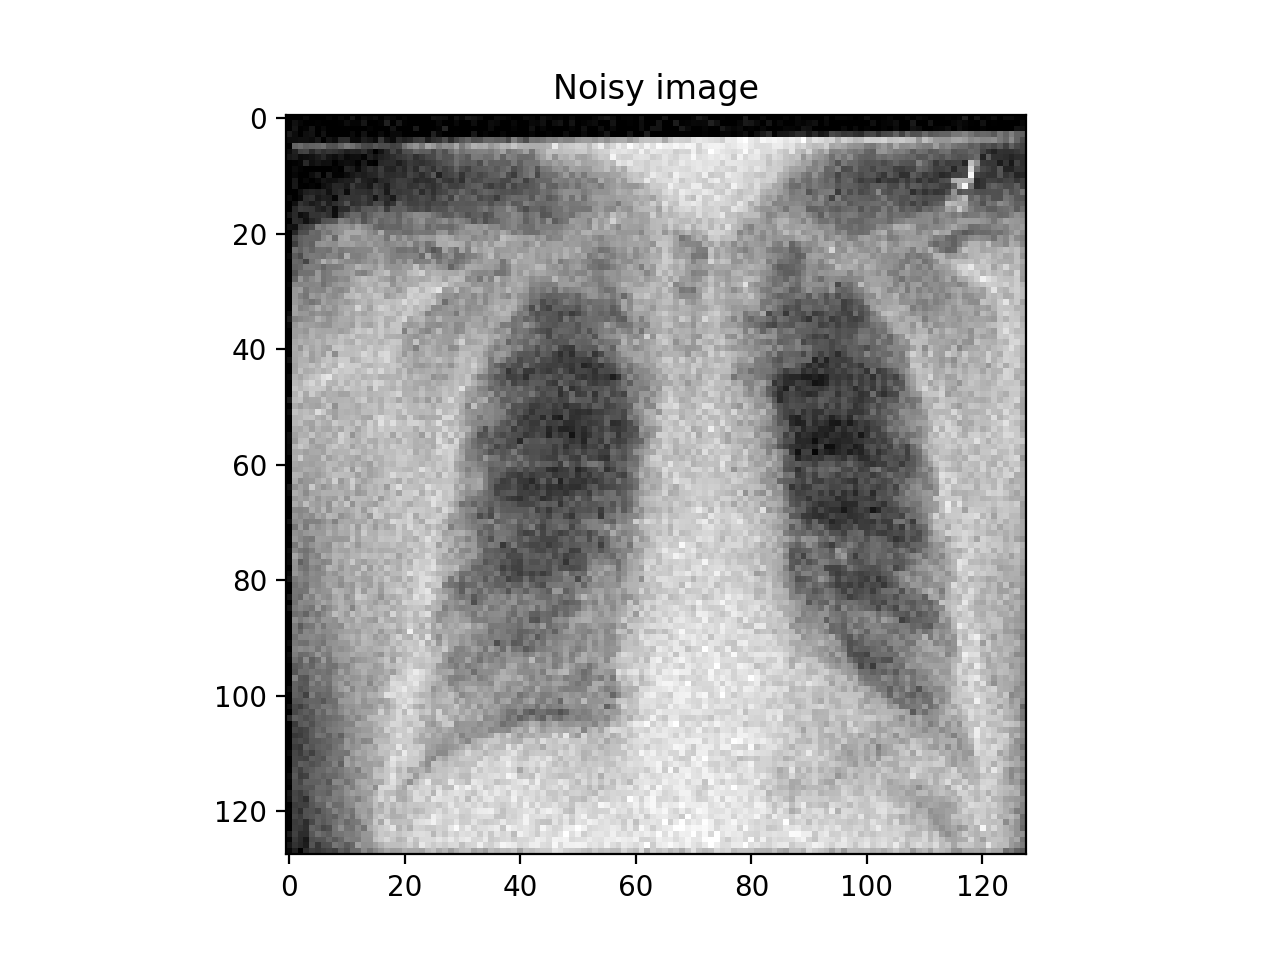

Text(0.5, 1.0, 'Noisy image')

In [14]:
J0 = np.load('chest.npy')
J0 = J0/255.0
fig,ax = plt.subplots()
ax.imshow(J0,cmap='gray',vmin=0,vmax=1)
ax.set_title('Original image')

J = J0 + np.random.randn(*J0.shape)*0.05
fig,ax = plt.subplots()
ax.imshow(J,cmap='gray',vmin=0,vmax=1)
ax.set_title('Noisy image')

<IPython.core.display.Javascript object>


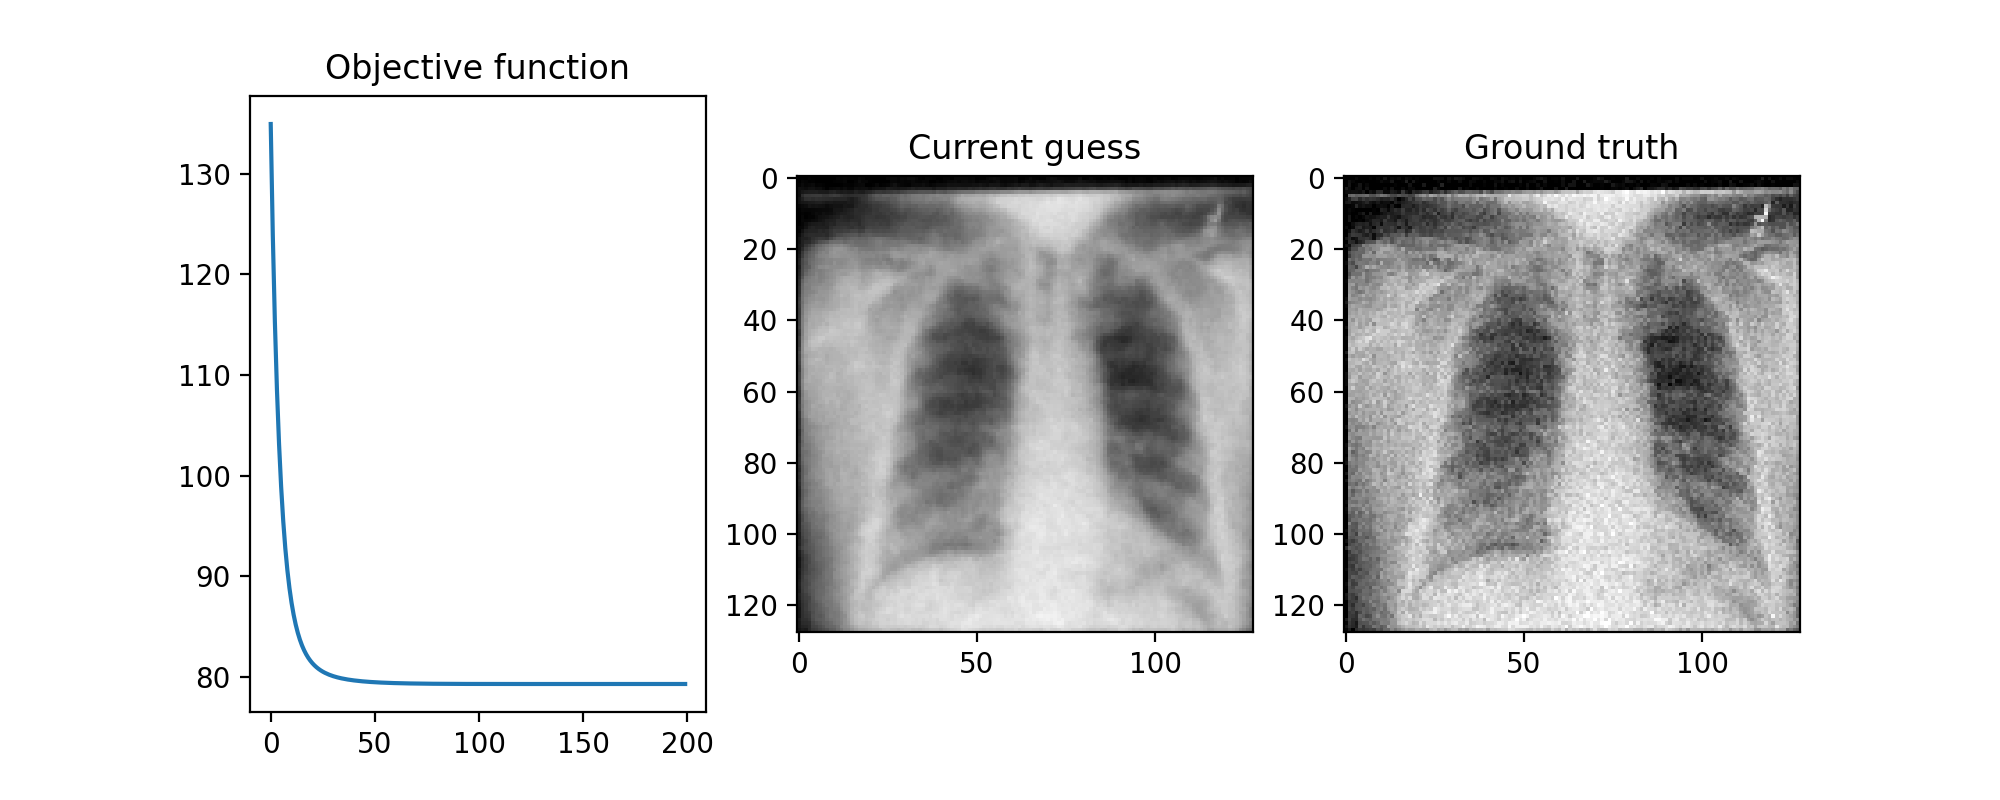

In [15]:
# initialize some parameters
niter = 200
ep = 1e-2
gamma = 1e-0

# save energy for plotting
Esave = []

# initial guess
I = np.copy(J)

# convolution kernel to compute the discrete Laplacian
k = np.array([[0.0, 1.0, 0.0],
              [1.0, -4.0, 1.0],
              [0.0, 1.0, 0.0]])

fig, ax = plt.subplots(1, 3, figsize=(10, 4))

for it in range(niter):
    # calculate derivative
    I_0, I_1 = np.gradient(I)

    # calculate objective function
    E = np.sum((I - J)**2) + gamma * np.sum(np.abs(I_0)**2 + np.abs(I_1)**2)
    Esave.append(E)

    # calculate Laplacian
    DeltaI = convolve(I, k)

    # calculate gradient
    gradient = 2 * ((I - J) - gamma * DeltaI)

    # update
    I = I - ep * gradient

    # raw
    if not it % 10 or it == niter - 1:
        ax[0].cla()
        ax[0].plot(Esave)
        ax[0].set_title('Objective function')
        ax[1].cla()
        ax[1].imshow(I, cmap='gray', vmin=0, vmax=1)
        ax[1].set_title('Current guess')
        ax[2].cla()
        ax[2].imshow(J, cmap='gray', vmin=0, vmax=1)
        ax[2].set_title('Ground truth')
        fig.canvas.draw()

## 3.2 A nonlinear approach

The previous approach tends to blur strong edges in an image, in addition to removing noise.

One can preserve edges by using a weaker penalty $\gamma (|\nabla I|^{2})^p$ for $\frac12 < p < 1$.

Consider the loss function
\begin{align}
E(I) &= \int |I(x) - J(x)|^2 + \gamma (|\nabla I(x) |^2|)^p dx
\end{align}

Note that when $p=0.5$ this loss function is not differentiable, and a different optimization technique would be required to solve the problem.



### Problem 3.2.1


By applying the chain rule, and following the example above, show that the gradient of this objective function with respect to $I$ is given by
\begin{align}
2(I(x) - J(x))  -2p\gamma  \text{div} \left[(|\nabla I(x)|^2)^{p-1}  \nabla I\right]
\end{align}


We start the problem with the following formula:
<br>
$\frac{d}{d\epsilon}  \int |I(x)  + \epsilon \delta I(x)  - J(x)|^2 + \gamma [|\nabla I(x) + \epsilon \nabla \delta I(x) |^2]^pdx  \bigg|_{\epsilon = 0}$
<br><br>

The first step is to expand the squares:
<br>
$\frac{d}{d\epsilon}  \int [[I^2  + 2\epsilon \delta I + \epsilon^2 \delta I^2 - 2I(J - 1)] + \gamma [|\nabla I + \epsilon \nabla \delta I |^2] + [2 \gamma p|\nabla I + \epsilon \nabla \delta I|^p |\nabla I + \epsilon \nabla \delta I|^{2 - p}] \cdot (\nabla I + \epsilon \nabla \delta I)dx]  \bigg|_{\epsilon = 0}$
<br><br>

After this, we plug in 0 for epsilon when we see a epsilon and differentiate with respect of the square terms to epsilon:
<br>
$\int [2I \delta I - 2(J - I) + 2 p \gamma \nabla I \cdot \nabla \delta I |\nabla I|^p|\nabla I|^{2-p}]dx$
<br><br>


We can also say that the divergence theorem allows us to rewrite $\nabla I \cdot \nabla \delta I$ as div $\nabla I \delta I$
<br>
$\int [2I \delta I - 2(J - I) + 2 p \gamma div \nabla I \nabla \delta I |\nabla I|^p|\nabla I|^{2-p}]dx$
<br><br>

We can also say that from the divergence theorem we can see that $\nabla I^2$ is the same as $\nabla I \cdot \nabla I$, which gives us the following:
<br>
$\int [2I \delta I - 2(J - I) + 2 p \gamma div \nabla I \nabla \delta I \cdot (|\nabla I|^2)^{p-1}$
<br><br>

Now we will separate the integrals by separating those with $\delta I$ and those that do not and distribute the negative back into the integral:
<br>
$2\int (-J + I)$ + $\int [2 p \gamma div \nabla I \nabla \delta I \cdot (|\nabla I|^2)^{p-1}]$
<br><br>

Now we combine back together:
<br>
$\int 2(I - J) + [2 p \gamma div \nabla I \nabla \delta I \cdot (|\nabla I|^2)^{p-1}]$
<br><br>

Now factor out the $\delta I$
<br>
$\int 2(I - J) + [2 p \gamma div \nabla I  \cdot (|\nabla I|^2)^{p-1}][\delta I]$
<br><br>

Plug in the gradient:
<br>
$\int 2(I(x) - J(x)) + [2 p \gamma div \nabla I  \cdot (|\nabla I(x)|^2)^{p-1}]$


### Problem 3.2.2

Build a gradient descent algorithm to remove noise from an image using the above objective function, and the same assumptions as problem 3.2.1.

### Problem 3.2.2 Solution
1. I changed our `E(I)` objective function to take the formula given here: \begin{align}
E(I) &= \int |I(x) - J(x)|^2 + \gamma (|\nabla I(x) |^2|)^p dx
\end{align}
2. Then I calculated the norm squared of the gradient:
    - We take each gradient I_0, I_1 divide both by 255.0, then take the resulting and square it
3. Then we take the result of `step 2` and raise to p - 1
4. Then we multiply the result of `step 3` twice, once for each gradient, and then normalize the result
5. Then we calculate the gradient using the formula: \begin{align}
2(I(x) - J(x))  -2p\gamma  \text{div} \left[(|\nabla I(x)|^2)^{p-1}  \nabla I\right]
\end{align}


<IPython.core.display.Javascript object>


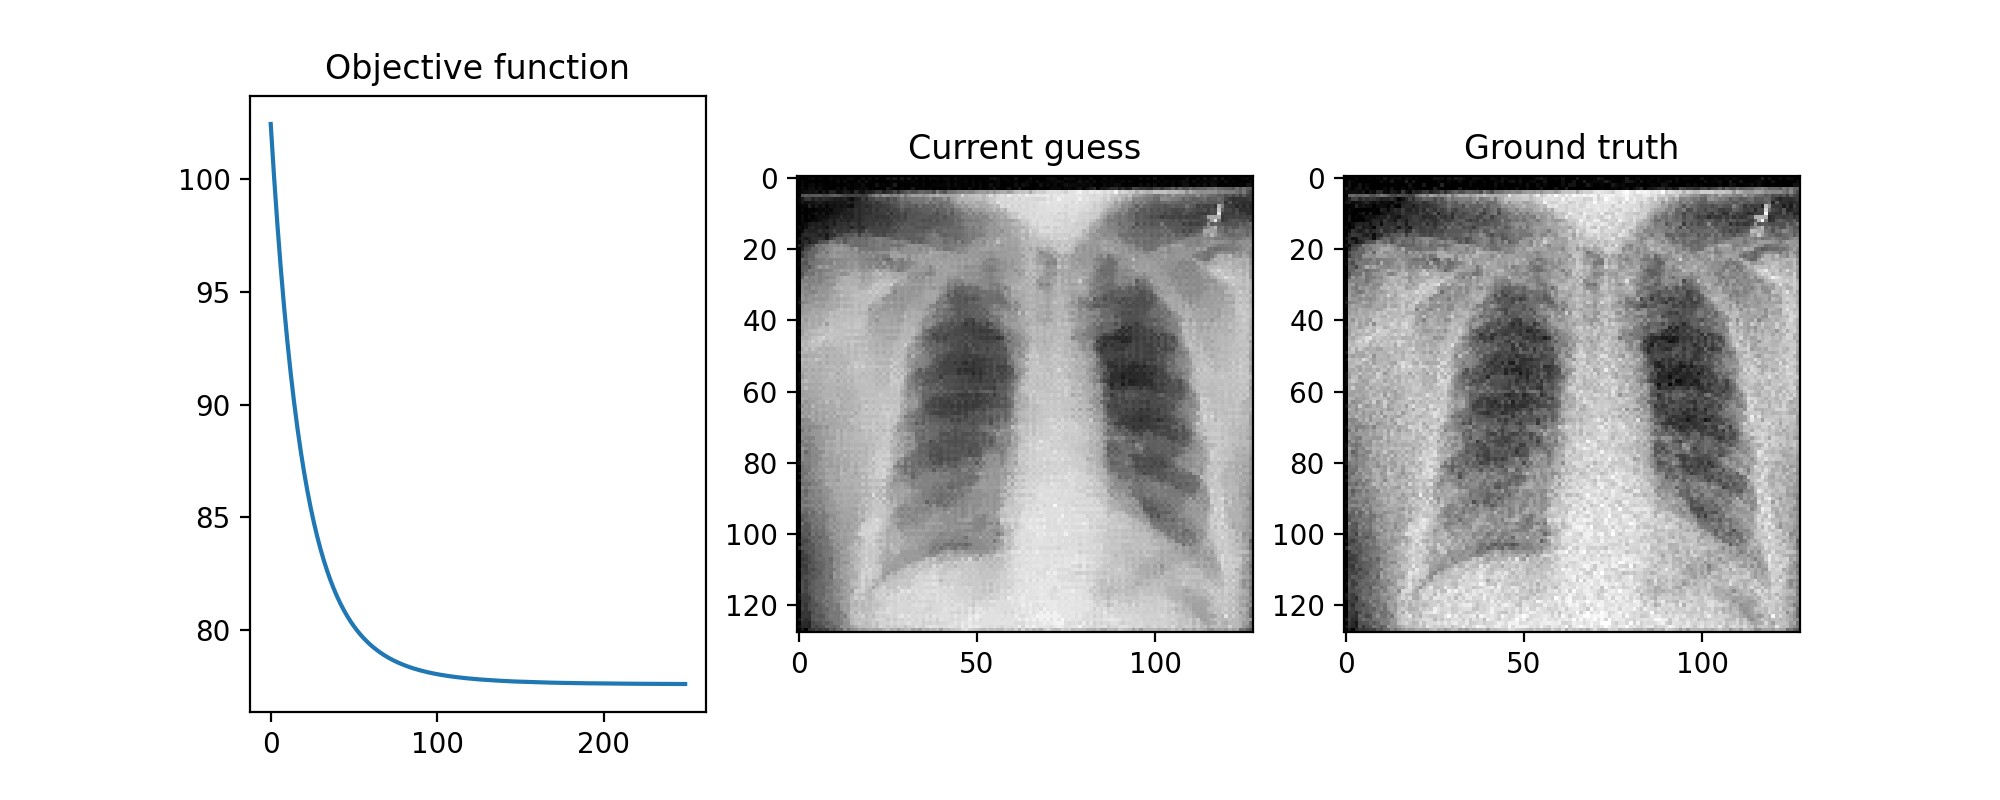

In [16]:
# initialize some parameters
niter = 250
ep = 1e-2
gamma = 1e-1
p = 0.51

# save energy for plotting
Esave = []

# initial guess
I = np.copy(J)


fig,ax = plt.subplots(1,3,figsize=(10,4))
for it in range(niter):
    
    # calculate derivative
    I_0, I_1 = np.gradient(I)

    # calculate objective function
    E = np.sum(np.abs(I - J)**2) + gamma * np.sum((np.abs(I_0**2 + I_1**2))**p)
    Esave.append(E)

    # calculate the norm squared of the gradient
    norm2dI = (I_0 / 255.0)**2 + (I_1 / 255.0)**2

    # raise the norm squared to the power p-1
    norm2pm1dI = norm2dI**(p-1)

    # multiply by the image gradient
    norm2pm1dI_times_I_0 = norm2pm1dI * I_0 / 255.0
    norm2pm1dI_times_I_1 = norm2pm1dI * I_1 / 255.0

    # compute the divergence
    div_norm2pm1dI_times_dI = np.gradient(norm2pm1dI_times_I_0, axis=0) + np.gradient(norm2pm1dI_times_I_1, axis=1)

    # calculate gradient
    gradient = 2 * (I - J) - 2 * p * gamma * div_norm2pm1dI_times_dI

    # update
    I = I - ep * gradient

    
    
    # draw
    if not it%10 or it == niter-1:
        ax[0].cla()
        ax[0].plot(Esave)
        ax[0].set_title('Objective function')
        ax[1].cla()
        ax[1].imshow(I,cmap='gray',vmin=0,vmax=1)
        ax[1].set_title('Current guess')
        ax[2].cla()
        ax[2].imshow(J,cmap='gray',vmin=0,vmax=1)
        ax[2].set_title('Ground truth')
        fig.canvas.draw()


## Part 4: template matching


Here we will consider using template matching to detect and discriminate between cell types.



In [30]:
def build_template_match(r, Istack2, method, h=0):
    # Initialize variables
    mu1 = np.zeros((2*r+1,2*r+1))
    mu0 = np.zeros((2*r+1,2*r+1))
    s20 = np.zeros(((2*r+1)**2,(2*r+1)**2))
    s21 = np.zeros(((2*r+1)**2,(2*r+1)**2))
    count =  0
    ndraw =  5

    # Loop through the images and calculate the mean and the mean of squares
    for i in range(len(Istack2)):
        x = Istack2[i]
        x = x /  255.0

        r0 = x.shape[0] //  2
        c0 = x.shape[1] //  2
        xc = x[r0 - r: r0 + r +  1, c0 - r: c0 + r +  1]
        xb = x[:  2 * r +  1, :  2 * r +  1]

        mu1 += xc
        mu0 += xb
        s20 += (xb.ravel()[:, None] @ xb.ravel()[None, :])
        s21 += (xc.ravel()[:, None] @ xc.ravel()[None, :])

        count +=  1

    # Normalize the means and mean squares
    mu0 = mu0 / count
    mu1 = mu1 / count
    s20 = s20 / count
    s21 = s21 / count

    # Calculate the covariance matrices
    Sigma0 = s20 - (mu0.ravel()[:, None] @ mu0.ravel()[None, :])
    Sigma1 = s21 - (mu1.ravel()[:, None] @ mu1.ravel()[None, :])
    Sigma = (Sigma0 + Sigma1) /  2

    # Find the displacement for entries in the covariance matrix
    Rows, Cols = np.meshgrid(np.arange(2*r+1), np.arange(2*r+1), indexing='ij')
    ROWS0 = Rows.ravel()[:, None] @ np.ones_like(Rows.ravel())[None, :]
    ROWS1 = np.ones_like(Rows.ravel()[:, None]) @ Rows.ravel()[None, :]
    Drows = ROWS0 - ROWS1

    COLS0 = Cols.ravel()[:, None] @ np.ones_like(Cols.ravel())[None, :]
    COLS1 = np.ones_like(Cols.ravel()[:, None]) @ Cols.ravel()[None, :]
    Dcols = COLS0 - COLS1

    displacements = np.unique(np.stack((Drows, Dcols)).reshape(2, -1), axis=(-1))

    # Initialize a new shift invariant covariance matrix
    S2disp = np.zeros_like(Sigma)
    for d in displacements.T:
        ind = (Drows == d[0]) & (Dcols == d[1])
        S2disp[ind] = np.mean(Sigma[ind])
        
    if method == "fishers":
        ind = 0
        if len(h) == 0:
            h = np.linalg.solve(S2disp,(mu1-mu0).ravel()).reshape(mu1.shape)
        response = convolve(Istack2[ind]/255.0,h[::-1,::-1],)
        return response, h, Istack2[ind], S2disp

### Problem 4.1.1

Load the dataset Istack0.npy, which contains images of erythroblasts against a background of red blood cells.

By copying the code already provided in class (and changing the npy file we load), build an optimal filter to detect erythroblasts versus background.  Don't forget to apply the shift invariance assumption to make sure we have a high quality full rank covariance matrix.

Apply this filter to the first image in the stack to visualize the results.

Make sure you save this filter, and the first image, for later.

### Problem 4.1.1 Solution
1. Load in the Istack0.npy data and visualize
2. I copied the code from class and made the function above called `build_template_match` which does the following:
    - I decided to build the Fisher discriminant:
        1. fisher discriminant, which projects class means with a small variance
   - I will return the response of the image, the h (filter), the first image, and the shift invariant covariance matrx in this function
   - I use the parameters of `r`, which is the radius, `Istack2` which is the image stack, `method` which is the filter method, and `h` which is the filter
       1. `h` is set to 0 because we will use it to pass in the lymphocyte or erythroblast filter to compare responses later on

<IPython.core.display.Javascript object>


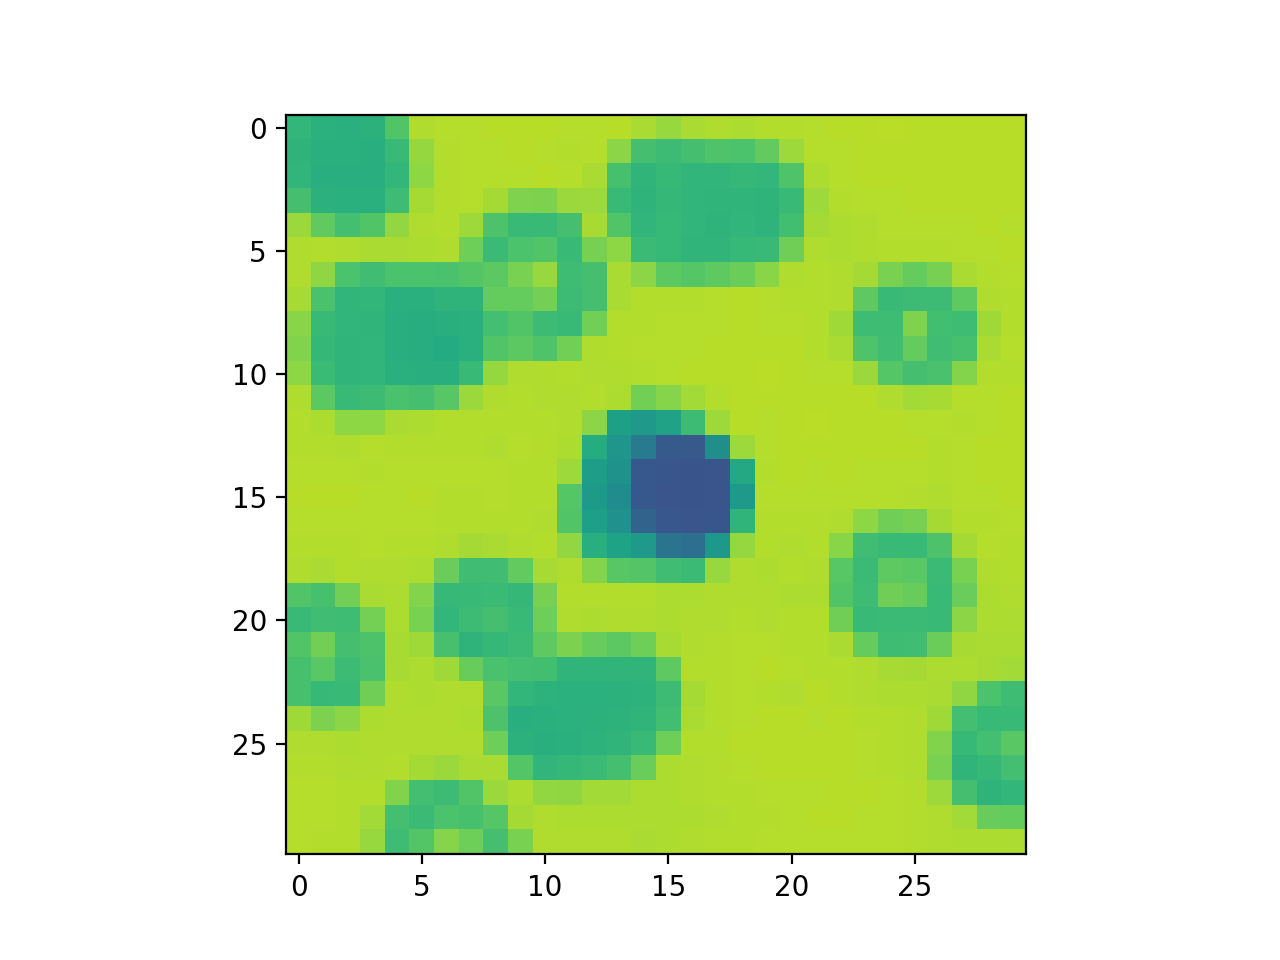

In [31]:
# your code here
Istack0 = np.load('Istack0.npy')
fig,ax = plt.subplots()
ax.imshow(Istack0[0],vmin=0,vmax=255)

<IPython.core.display.Javascript object>


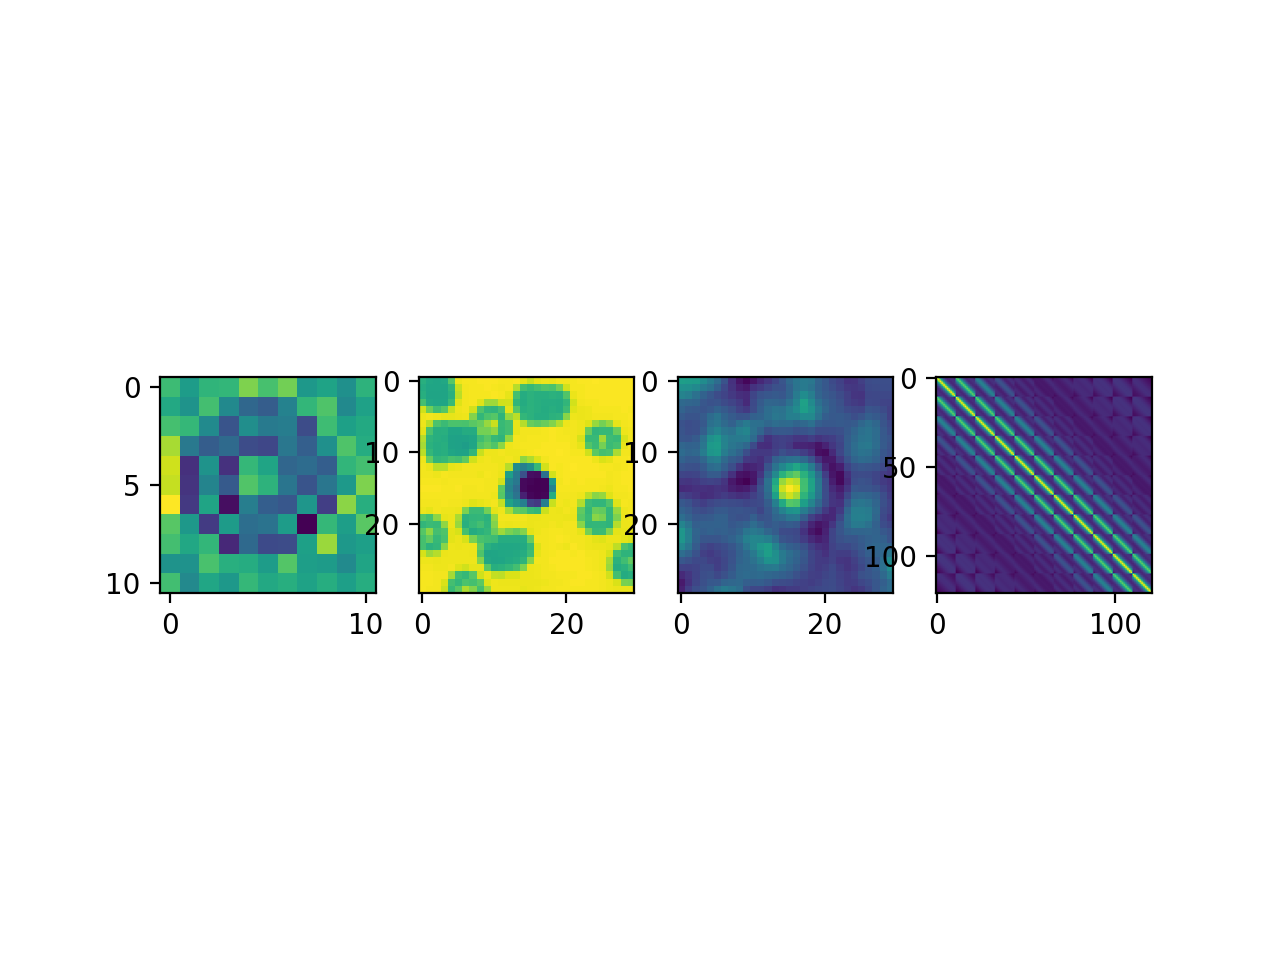

In [32]:
r =  5
response_erythroblast, h_erythroblast, first_erythroblast, S2disp_erythroblast = build_template_match(r,
                                                                                                      Istack0,
                                                                                                      "fishers",
                                                                                                      h=[])
fig,ax = plt.subplots(1,4)
ax[0].imshow(h_erythroblast)
ax[1].imshow(first_erythroblast)
ax[2].imshow(response_erythroblast)
ax[3].imshow(S2disp_erythroblast)

### Problem 4.1.2

Load the dataset Istack1.npy, which contains images of lymphocyte against a background of red blood cells.

By copying the code already provided in class (and changing the npy file we load), build an optimal filter to detect lymphocytes versus background.  Don't forget to apply the shift invariance assumption to make sure we have a high quality full rank covariance matrix.

Apply this filter to the first image in the stack to visualize the results.

Make sure you save this filter, and the first image, for later.

### Problem 4.1.2 Solution
1. The same steps as `problem 4.1.1`

<IPython.core.display.Javascript object>


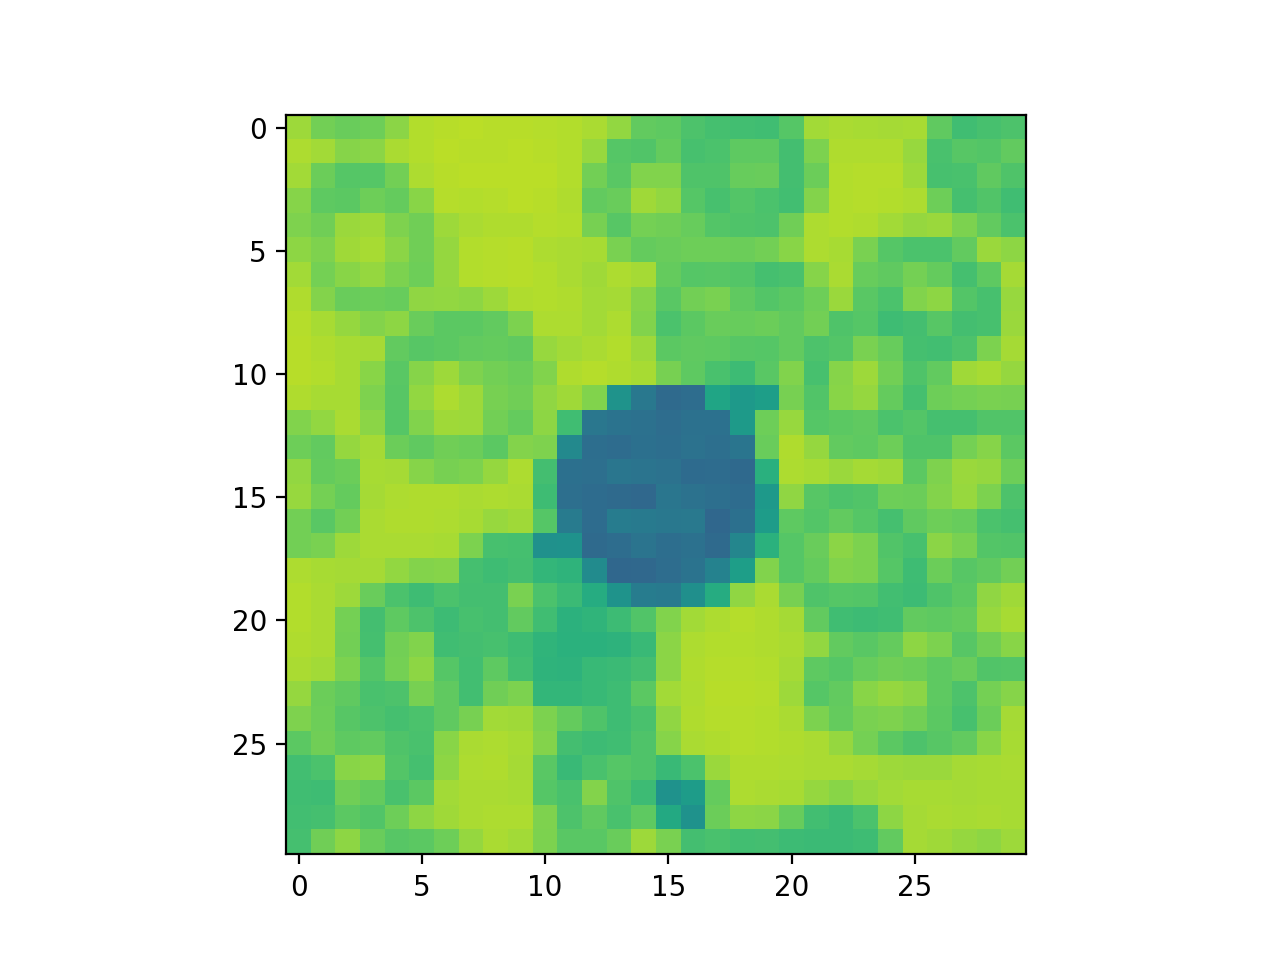

In [33]:
Istack1 = np.load('Istack1.npy')
fig,ax = plt.subplots()
ax.imshow(Istack1[0],vmin=0,vmax=255)

<IPython.core.display.Javascript object>


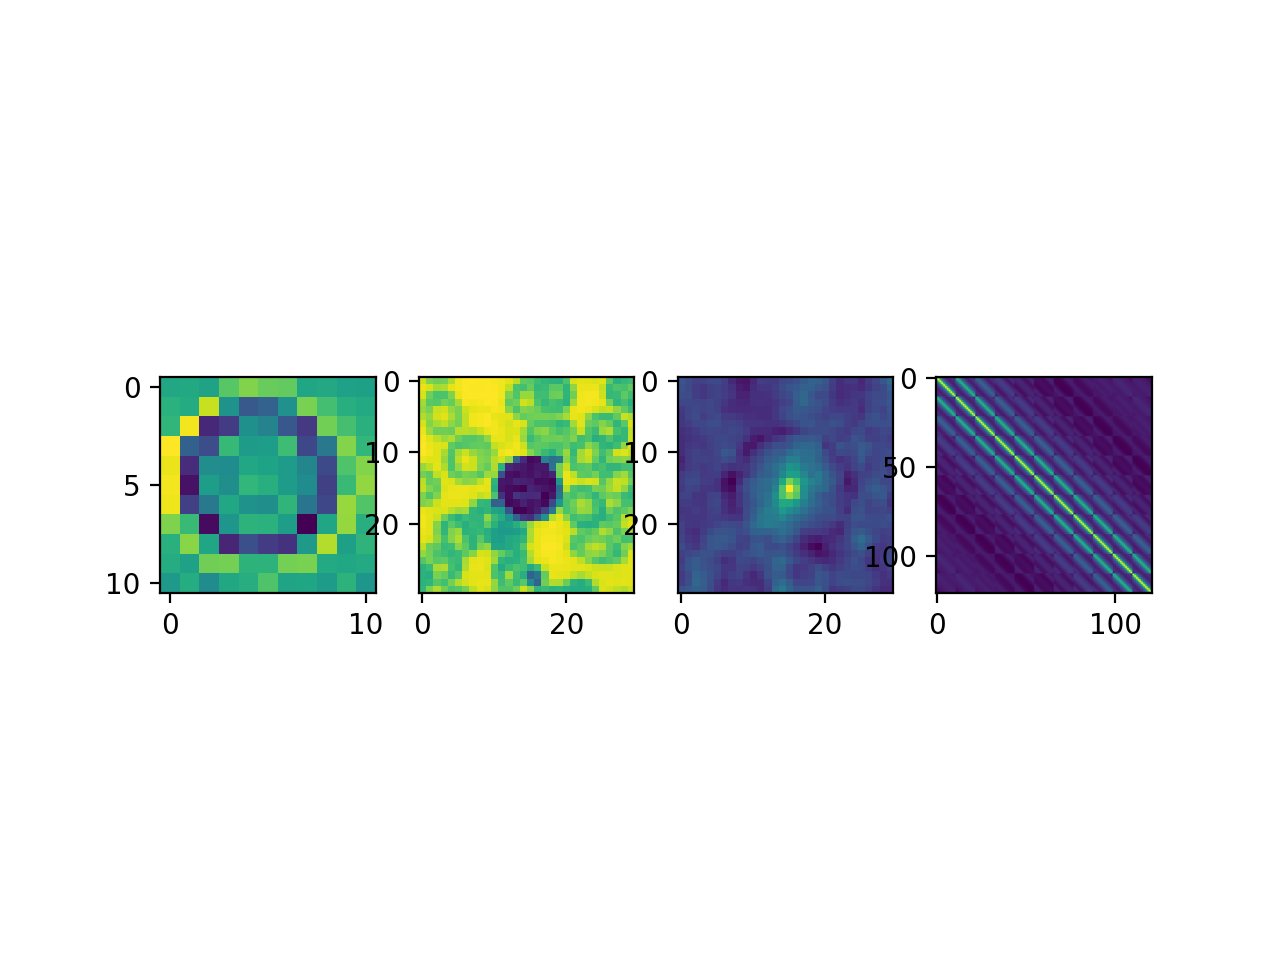

In [34]:
r =  5
response_lymphocyte, h_lymphocyte, first_lymphocyte, S2disp_lymphocyte = build_template_match(r,
                                                                                              Istack1,
                                                                                              "fishers",
                                                                                              h=[])
fig,ax = plt.subplots(1,4)
ax[0].imshow(h_lymphocyte)
ax[1].imshow(first_lymphocyte)
ax[2].imshow(response_lymphocyte)
ax[3].imshow(S2disp_lymphocyte)

### Problem 4.1.3

Apply both your filters to the image containing the erythroblast and visualize the results.  Which one gives a larger response?

Next, apply both your filters to the image containing the lymphocyte and visualize the results. Which one gives a larger response?

### Problem 4.1.3 Solution
1. I call the function I made above and pass in the filter values returned from `problem 4.1.2`
2. Next I graph the original values from the function and then the values returned by passing in the filter

<IPython.core.display.Javascript object>


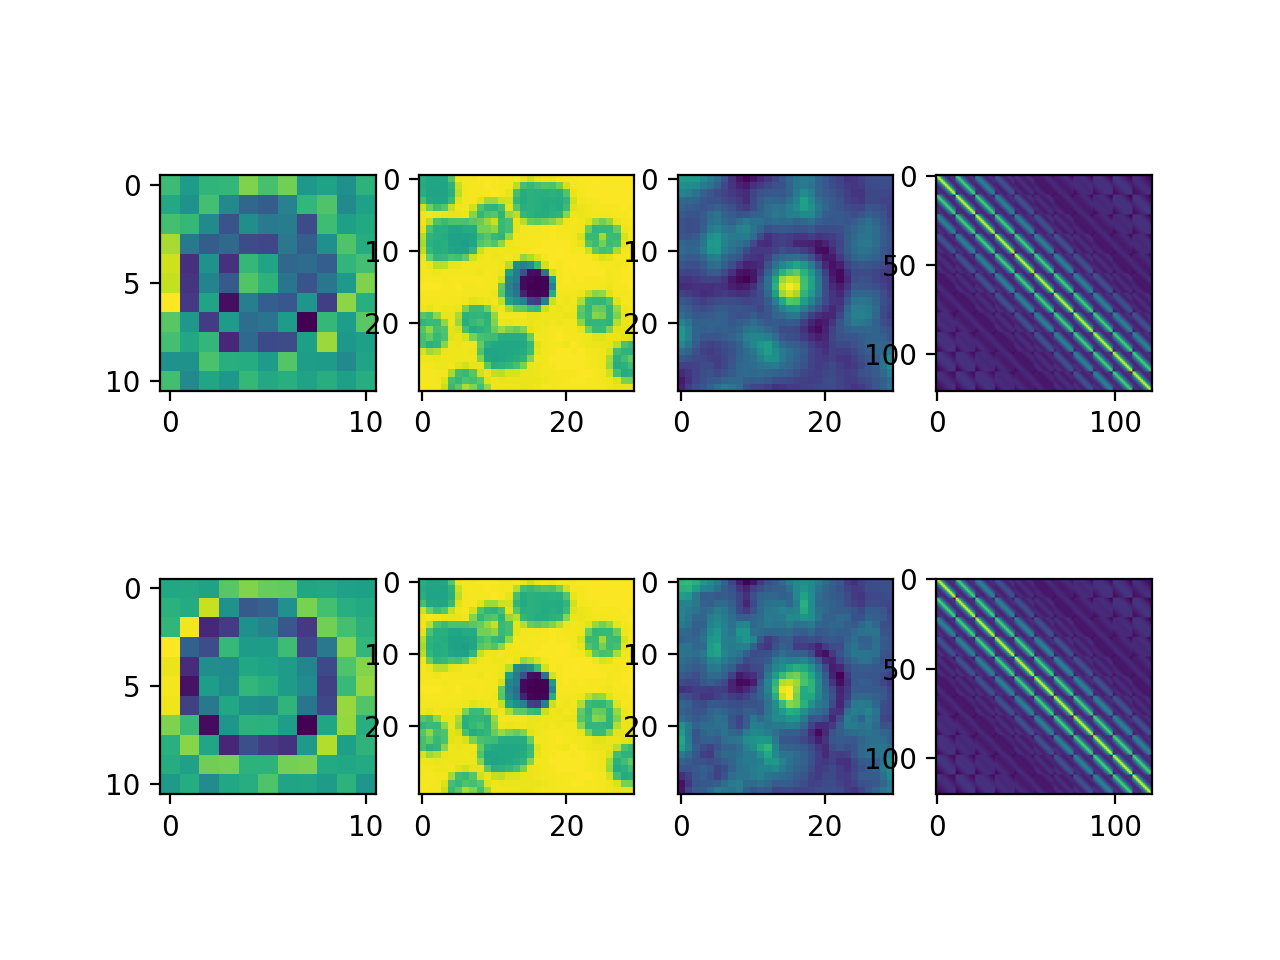

In [35]:
response_erythroblast2, h_erythroblast2, first_erythroblast2, S2disp_erythroblast2 = build_template_match(r,
                                                                                              Istack0,
                                                                                              "fishers",
                                                                                              h=h_lymphocyte)
fig,ax = plt.subplots(2,4)
ax[0][0].imshow(h_erythroblast)
ax[0][1].imshow(first_erythroblast)
ax[0][2].imshow(response_erythroblast)
ax[0][3].imshow(S2disp_erythroblast)
ax[1][0].imshow(h_erythroblast2)
ax[1][1].imshow(first_erythroblast2)
ax[1][2].imshow(response_erythroblast2)
ax[1][3].imshow(S2disp_erythroblast2)

In [36]:
print(np.max(response_erythroblast))
print(np.max(response_erythroblast2))

27.652358114196467
-10.324868836555678


It is clear that the erythroblast filter has a higher response than the filter with the lymphocyte filter.

<IPython.core.display.Javascript object>


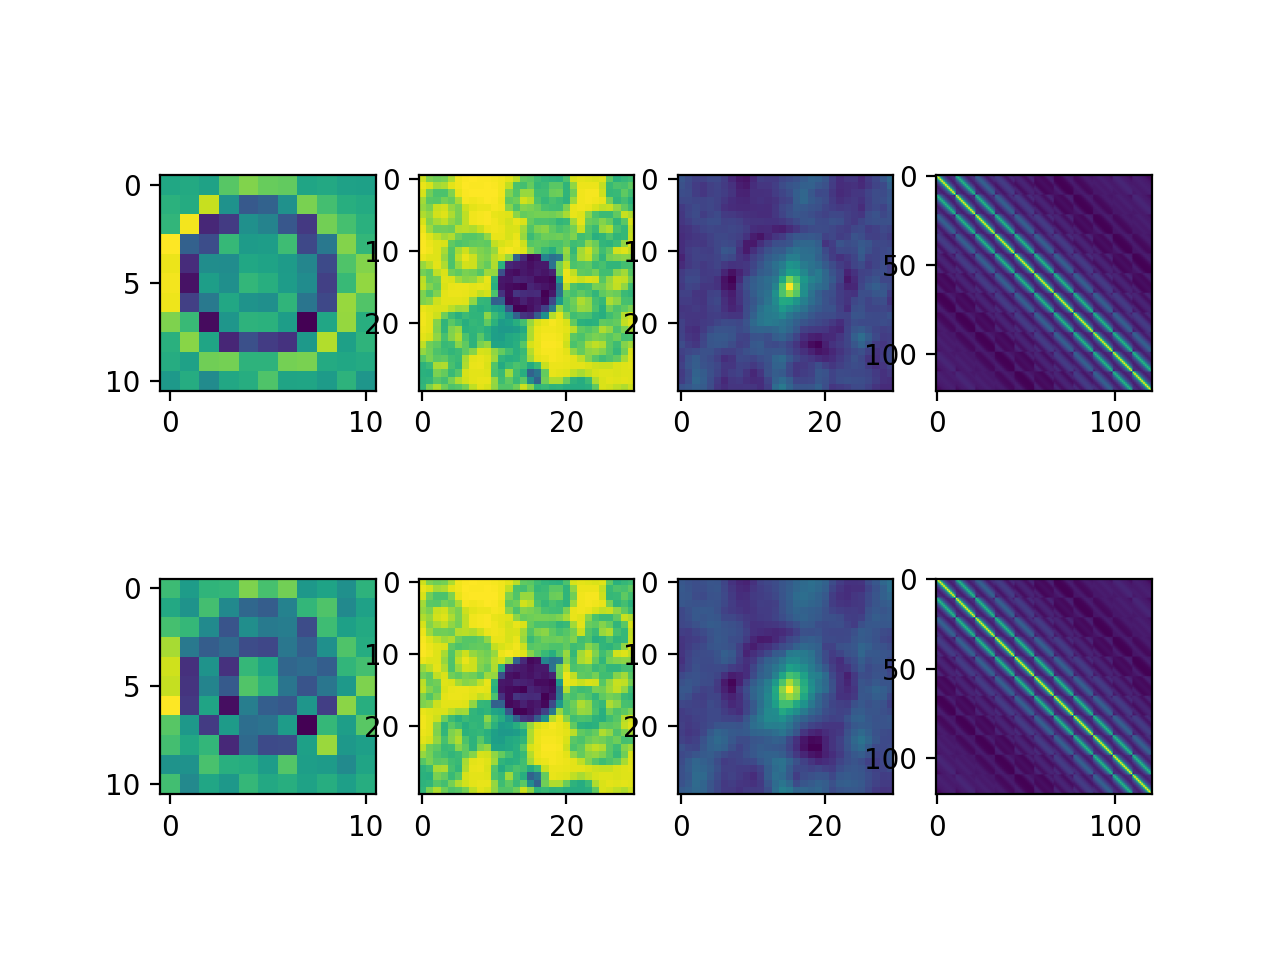

In [37]:
r =  5
response_lymphocyte2, h_lymphocyte2, first_lymphocyte2, S2disp_lymphocyte2 = build_template_match(r,
                                                                                              Istack1,
                                                                                              "fishers",
                                                                                              h=h_erythroblast)
fig,ax = plt.subplots(2,4)
ax[0][0].imshow(h_lymphocyte)
ax[0][1].imshow(first_lymphocyte)
ax[0][2].imshow(response_lymphocyte)
ax[0][3].imshow(S2disp_lymphocyte)
ax[1][0].imshow(h_lymphocyte2)
ax[1][1].imshow(first_lymphocyte2)
ax[1][2].imshow(response_lymphocyte2)
ax[1][3].imshow(S2disp_lymphocyte2)

In [38]:
print(np.max(response_lymphocyte))
print(np.max(response_lymphocyte2))

57.85171194120186
42.532465773416


The original lymphocyte has a greater max response than the lymphocyte with the erythroblast filter.

### Problem 4.1.3

Build an optimal filter to detect erythroblasts versus lymphocytes. Don't forget to apply the shift invariance assumption to make sure we have a high quality full rank covariance matrix.

Apply this filter to the image containing the erythroblast and visualize the result.

Apply this filter to the image containing the lymhocyte and visualize the results.

Comment on the filter's response to the cell in the center in these two cases, versus the red blodd cells in the background.

### Problem 4.1.4 Solution
1. In order to solve this problem I took the following steps:
    - Took the code from the function I wrote earlier:
        - I first got the original filter/response from the function and show what the response looks like for the erythroblast and the lymphocyte
        - Next, I pass in that filter/response to my functions `h` parameter for both the lymphocyte and the erythroblast  and visualize the results

<IPython.core.display.Javascript object>


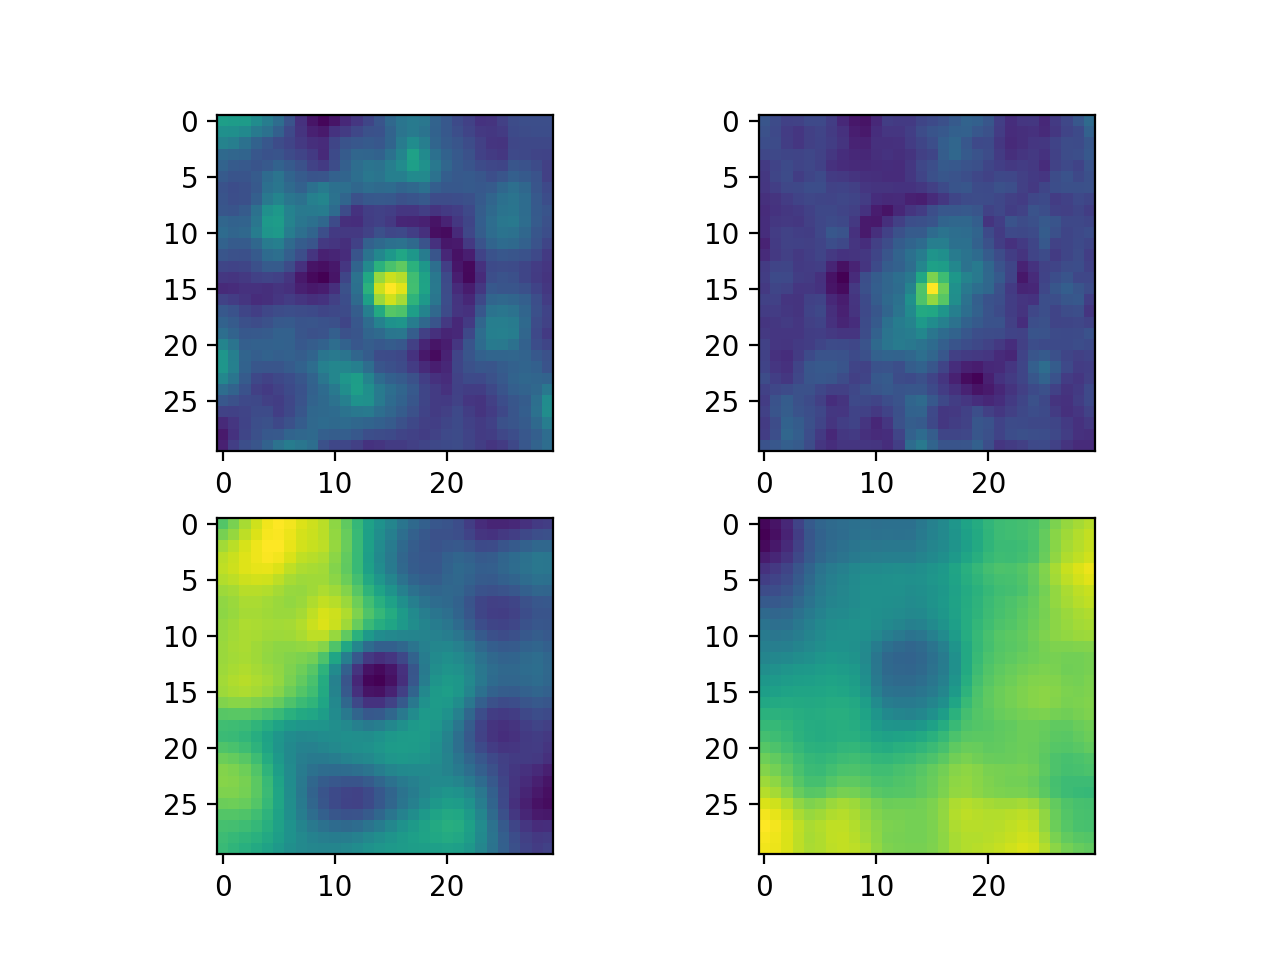

In [25]:
r = 5 
method = "fishers"
h_erythroblast, _, _, _ = build_template_match(r, Istack0, method, h=[])
h_lymphocyte, _, _, _ = build_template_match(r, Istack1, method, h=[])

fig,ax = plt.subplots(2,2)
ax[0][0].imshow(h_erythroblast)
ax[0][1].imshow(h_lymphocyte)


response_erythroblast, _, _, _ = build_template_match(r, Istack0, method, h_erythroblast)
response_lymphocyte, _, _, _ = build_template_match(r, Istack1, method, h_lymphocyte)

ax[1][0].imshow(response_erythroblast)
ax[1][1].imshow(response_lymphocyte)

When looking at the responses from the filter it looks like the erythroblast has a much more defined region. What I mean by this is that we can clearly see a dark circle that highlights the the erythroblast. We also see that the blood cells around it reflect a green color on the left and a darker blue color on the right. This could be important becuase it could show us how the blood cells are reacting around the site of the erythroblast.
<br><br>
When looking at the lymphocyte we see that it is a bit harder to make out. Although there is a dark circle around it, it is quite blurry. On the contrary to the erythroblast we see that the right side of the circle is green while the left side is blue.
<br><br>
Overall, it seems that the filter is working as we can make out our objects versus the blood cells and can now distinctively see that the lymphocyte is not as strong as the erythroblast so we can classify the two in their own respective classes.

References:
1. https://stackoverflow.com/questions/72688853/get-center-of-bins-histograms-python
2. https://towardsdatascience.com/fishers-linear-discriminant-intuitively-explained-52a1ba79e1bb